In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load only columns A and C from sheet 2
xlsx_path   = "D:\emirandaz\qus\data\PUCP_BSC_225&500&1000MHz_07072025_last.xlsx"
df          = pd.read_excel(xlsx_path, sheet_name=1, usecols="A,C")

# Drop rows with NaN values
# df = df.dropna()
df.columns = ['Frequency', 'BSC_Mean']

# Log-transform
log_f   = np.log(df['Frequency'].values)
log_bsc = np.log(df['BSC_Mean'].values)

# Linear fit: log(BSC) = log(b) + n * log(freq)
coeffs  = np.polyfit(log_f, log_bsc, 1)
n       = coeffs[0]
log_b   = coeffs[1]
b       = np.exp(log_b)

# Generate fitted curve
freq_fit     = np.linspace(df['Frequency'].min(), df['Frequency'].max(), 200)
bsc_fit     = b * freq_fit**n



<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
C:\Users\emirandaz\AppData\Local\Temp\ipykernel_66920\1578695155.py:6: SyntaxWarning: invalid escape sequence '\e'
  xlsx_path   = "D:\emirandaz\qus\data\PUCP_BSC_225&500&1000MHz_07072025_last.xlsx"


<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
C:\Users\emirandaz\AppData\Local\Temp\ipykernel_66920\3439459406.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('BSC [cm$^{-1}$ $\cdot$ sr$^{-1}$]')


(0.9, 8.25)

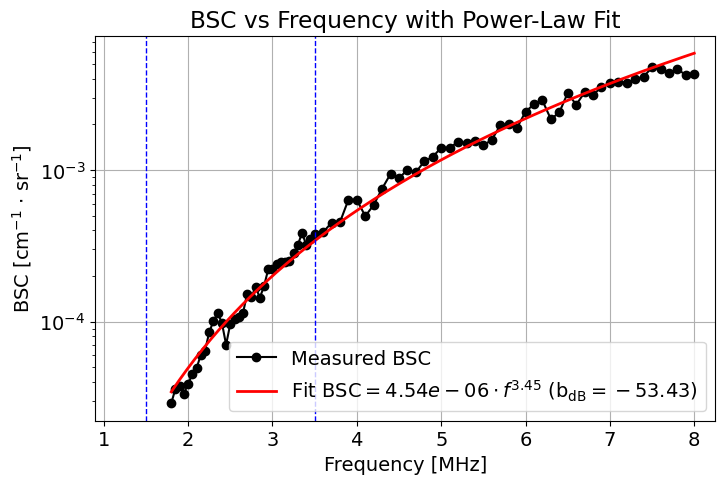

In [26]:
# Plot
plt.figure(figsize=(8, 5))

plt.semilogy(df['Frequency'], df['BSC_Mean'], 'ko-', label='Measured BSC')
# plt.semilogy(freq_fit, bsc_fit, 'r-', linewidth=2,
#          label=rf'$ \mathrm{{Fit \ BSC}} = {b:.2e} \cdot f^{{{n:.2f}}} $')
b_db = 10 * np.log10(b)

plt.semilogy(freq_fit, bsc_fit, 'r-', linewidth=2,
    label=rf'$ \mathrm{{Fit\ BSC}} = {b:.2e} \cdot f^{{{n:.2f}}} \ \mathrm{{(b_{{dB}}={b_db:.2f})}} $')

# Add vertical lines
plt.axvline(x=1.5, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=3.5, color='blue', linestyle='--', linewidth=1)



plt.xlabel('Frequency [MHz]')
plt.ylabel('BSC [cm$^{-1}$ $\cdot$ sr$^{-1}$]')
plt.title('BSC vs Frequency with Power-Law Fit')
plt.legend()
plt.grid(True)
plt.rcParams.update({'font.size': 14})  # Sets font size for all elements
plt.xlim([0.9, 8.25])

In [15]:
b_db = 10 * np.log10(b)

print(f"Fit parameters:")
print(f"b (linear)   = {b:.3e}")
print(f"b (in dB)    = {b_db:.2f} dB")
print(f"n (exponent) = {n:.2f}")


Fit parameters:
b (linear)   = 4.541e-06
b (in dB)    = -53.43 dB
n (exponent) = 3.45
